In [6]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
#Visualizar dataset iris
dataset_iri = pd.read_csv('iris.csv')
dataset_iri.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Visualizar dataset de emails
dataset_ema = pd.read_csv('emails.csv')
dataset_ema.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
#Dividir dataset en 70% entrenamiento y 30% prueba para iris
x_iri = dataset_iri.iloc[:, :-1].values
y_iri = dataset_iri.iloc[:, 4].values
x_train_iri, x_test_iri, y_train_iri, y_test_iri = train_test_split(x_iri, y_iri, test_size=0.3, random_state=0)

In [10]:
#Dividir dataset en 70% entrenamiento y 30% prueba para emails
x_ema = dataset_ema.iloc[:, 1:-1].values
y_ema = dataset_ema.iloc[:, -1].values
x_train_ema, x_test_ema, y_train_ema, y_test_ema = train_test_split(x_ema, y_ema, test_size=0.3, random_state=0)

In [11]:
# Inicializar KFold
kf = KFold(n_splits=5)

# Diccionario para almacenar los resultados
results = {
    'Dataset': [],
    'No. Pliegues': [],
    'Distribución': [],
    'Pliegue': [],
    'Accuracy': []
}

# Función para el entrenamiento
def train_model(dataset_name, data_x, data_y, model, distribution):
    sum_accuracy = 0
    p = 1
    for train_index, test_index in kf.split(data_x):
        x_train, x_test = data_x[train_index], data_x[test_index]
        y_train, y_test = data_y[train_index], data_y[test_index]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        sum_accuracy += accuracy
        results['Dataset'].append(dataset_name)
        results['No. Pliegues'].append(5)
        results['Distribución'].append(distribution)
        results['Pliegue'].append(p)
        results['Accuracy'].append(accuracy)
        p += 1
    # Añadir el promedio
    results['Dataset'].append(dataset_name)
    results['No. Pliegues'].append(5)
    results['Distribución'].append(distribution)
    results['Pliegue'].append("Promedio")
    results['Accuracy'].append(sum_accuracy / 5)

# Entrenar y validar para Iris Normal y Multinomial
train_model('iris.csv', x_train_iri, y_train_iri, GaussianNB(), 'Normal')
train_model('iris.csv', x_train_iri, y_train_iri, MultinomialNB(), 'Multinomial')

# Entrenar y validar para Emails Normal y Multinomial
train_model('emails.csv', x_train_ema, y_train_ema, GaussianNB(), 'Normal')
train_model('emails.csv', x_train_ema, y_train_ema, MultinomialNB(), 'Multinomial')

# Crear DataFrame
df = pd.DataFrame(results)

# Imprimir la tabla
print(tabulate(df, headers='keys', tablefmt='pretty'))

+----+------------+--------------+--------------+----------+--------------------+
|    |  Dataset   | No. Pliegues | Distribución | Pliegue  |      Accuracy      |
+----+------------+--------------+--------------+----------+--------------------+
| 0  |  iris.csv  |      5       |    Normal    |    1     | 0.8571428571428571 |
| 1  |  iris.csv  |      5       |    Normal    |    2     | 0.9523809523809523 |
| 2  |  iris.csv  |      5       |    Normal    |    3     |        1.0         |
| 3  |  iris.csv  |      5       |    Normal    |    4     |        1.0         |
| 4  |  iris.csv  |      5       |    Normal    |    5     | 0.9047619047619048 |
| 5  |  iris.csv  |      5       |    Normal    | Promedio | 0.9428571428571428 |
| 6  |  iris.csv  |      5       | Multinomial  |    1     | 0.5714285714285714 |
| 7  |  iris.csv  |      5       | Multinomial  |    2     | 0.7142857142857143 |
| 8  |  iris.csv  |      5       | Multinomial  |    3     | 0.9523809523809523 |
| 9  |  iris.csv

In [13]:
results_final = {
    'Dataset': [],
    'Distribución': [],
    'Accuracy': []
}
model = GaussianNB()
model.fit(x_train_iri, y_train_iri)
y_pred_iri = model.predict(x_test_iri)
accuracy = accuracy_score(y_test_iri, y_pred_iri)
results_final['Dataset'].append("iris.csv")
results_final['Distribución'].append('GaussianNB')
results_final['Accuracy'].append(accuracy)

model = GaussianNB()
model.fit(x_train_ema, y_train_ema)
y_pred_ema = model.predict(x_test_ema)
accuracy = accuracy_score(y_test_ema, y_pred_ema)
results_final['Dataset'].append("emails.csv")
results_final['Distribución'].append('GaussianNB')
results_final['Accuracy'].append(accuracy)

# Crear DataFrame
df_final = pd.DataFrame(results_final)

# Imprimir la tabla
print(tabulate(df_final, headers='keys', tablefmt='pretty'))

+---+------------+--------------+--------------------+
|   |  Dataset   | Distribución |      Accuracy      |
+---+------------+--------------+--------------------+
| 0 |  iris.csv  |  GaussianNB  |        1.0         |
| 1 | emails.csv |  GaussianNB  | 0.9484536082474226 |
+---+------------+--------------+--------------------+


In [14]:
def evaluate_model(dataset_name, data_x_train, data_y_train, data_x_test, data_y_test, model_class, config_name):
    model = model_class()
    model.fit(data_x_train, data_y_train)
    predictions = model.predict(data_x_test)

    # Matriz de confusión
    cm = confusion_matrix(data_y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matriz de Confusión para {dataset_name} - {config_name}')
    plt.show()

    # Reporte de clasificación
    print(f"Reporte de Clasificación para {dataset_name} - {config_name}:\n")
    print(classification_report(data_y_test, predictions))

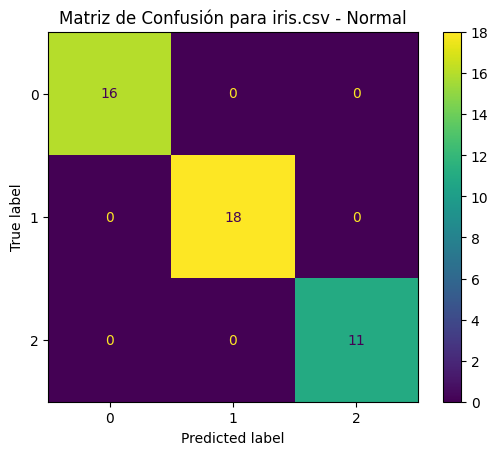

Reporte de Clasificación para iris.csv - Normal:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



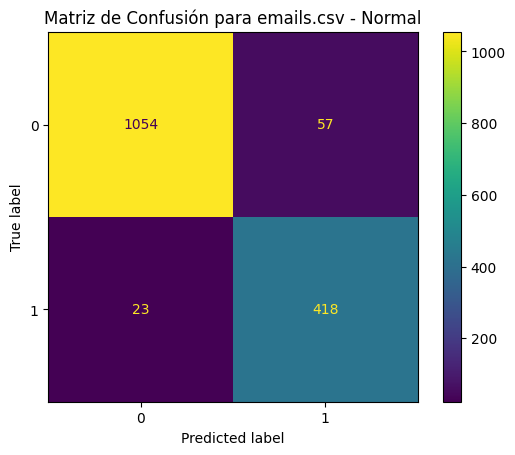

Reporte de Clasificación para emails.csv - Normal:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



In [15]:
# Datos de entrenamiento y prueba para iris
data_x_train_iri, data_y_train_iri = x_train_iri, y_train_iri
data_x_test_iri, data_y_test_iri = x_test_iri, y_test_iri

# Datos de entrenamiento y prueba para emails
data_x_train_ema, data_y_train_ema = x_train_ema, y_train_ema
data_x_test_ema, data_y_test_ema = x_test_ema, y_test_ema

# Evaluar para iris
evaluate_model('iris.csv', data_x_train_iri, data_y_train_iri, data_x_test_iri, data_y_test_iri, GaussianNB, 'Normal')

# Evaluar para emails
evaluate_model('emails.csv', data_x_train_ema, data_y_train_ema, data_x_test_ema, data_y_test_ema, GaussianNB, 'Normal')